In [1]:
# import necessary packages

import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
# import sys
# !{sys.executable} -m pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# read the data
df = pd.read_csv("dataset/parkinsons.data")

In [3]:
# inspect data
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
# features
features = df.loc[:,df.columns != 'status'].values[:, 1:]

# label is status column
labels = df.loc[:, 'status'].values

In [6]:
# get count of each label (0 and 1) in labels

print(labels[labels == 1].shape[0], labels[labels == 0].shape[0])

147 48


In [7]:
# scale features

scaler = MinMaxScaler((-1, 1))

x = scaler.fit_transform(features)

y = labels

In [8]:
# split dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 0)

In [9]:
# train model
model = XGBClassifier()

model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [10]:
# calculate accuracy

y_predict = model.predict(x_test)

In [11]:
# print accuracy

print(accuracy_score(y_test, y_predict)*100)

94.87179487179486


In [12]:
# import seaborn
import seaborn as sn

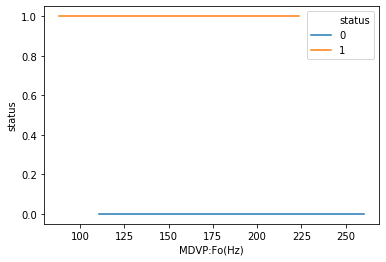

In [17]:
# data visualization for the above dataset
# use seaborn for the same purpose
sn.lineplot(x = df["MDVP:Fo(Hz)"], y = df["status"], hue = df["status"])